Starting to diverge to +inf or oscillate at r = 1e-08
Starting to diverge to +inf or oscillate at r = 0.9451800099983332
Starting to diverge to +inf or oscillate at r = 1.786470010003236
Starting to diverge to +inf or oscillate at r = 1.9757900100044763
Starting to diverge to +inf or oscillate at r = 2.2708400100064092
Starting to diverge to +inf or oscillate at r = 3.508130010014515
Starting to diverge to +inf or oscillate at r = 3.6541700100154717
Starting to diverge to +inf or oscillate at r = 3.9542700100174377
Starting to diverge to +inf or oscillate at r = 4.0122400100172735
Starting to diverge to +inf or oscillate at r = 4.084990010014519
Starting to diverge to +inf or oscillate at r = 4.182950010010811
Starting to diverge to +inf or oscillate at r = 4.33407001000509
Starting to diverge to +inf or oscillate at r = 4.687150009991723
Starting to diverge to +inf or oscillate at r = 4.7699200099885894
Starting to diverge to +inf or oscillate at r = 4.889130009984076
Starting to dive

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Complete.


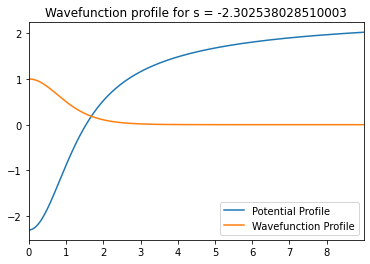

In [7]:
# This code uses a Runge-Kutta 4th order algorithm to solve for the initial soliton profile

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si

#Note that the spatial resolution of the profile must match the specification of delta_x in the main code.
dr = .00001
max_radius = 9
rge = max_radius/dr


def g1(r, a, b, c):
    return -(2/r)*c+2*b*a + 0.*np.exp(-np.power(r,2)/0.1)

def g2(r, a, d):
    return 4*np.pi*a**2-(2/r)*d

s = 0.
diff = 1.
optimised = False

while optimised == False:

    ai = 1
    bi = s
    ci = 0
    di = 0

    la = []
    lb = []
    lc = []
    ld = []
    lr = []
    intlist = []

    la.append(ai)
    lb.append(bi)
    lc.append(ci)
    ld.append(di)
    lr.append(dr/1000)
    intlist.append(0.)


    # kn lists follow index a, b, c, d, i.e. k1[0] is k1a
    k1 = []
    k2 = []
    k3 = []
    k4 = []

    for i in range(int(rge)):

        list1 = []
        list1.append(lc[i]*dr)
        list1.append(ld[i]*dr)
        list1.append(g1(lr[i],la[i],lb[i],lc[i])*dr)
        list1.append(g2(lr[i],la[i],ld[i])*dr)
        k1.append(list1)

        list2 = []
        list2.append((lc[i]+k1[i][2]/2)*dr)
        list2.append((ld[i]+k1[i][3]/2)*dr)
        list2.append(g1(lr[i]+dr/2,la[i]+k1[i][0]/2,lb[i]+k1[i][1]/2,lc[i]+k1[i][2]/2)*dr)
        list2.append(g2(lr[i]+dr/2,la[i]+k1[i][0]/2,ld[i]+k1[i][3]/2)*dr)
        k2.append(list2)

        list3 = []
        list3.append((lc[i]+k2[i][2]/2)*dr)
        list3.append((ld[i]+k2[i][3]/2)*dr)
        list3.append(g1(lr[i]+dr/2,la[i]+k2[i][0]/2,lb[i]+k2[i][1]/2,lc[i]+k2[i][2]/2)*dr)
        list3.append(g2(lr[i]+dr/2,la[i]+k2[i][0]/2,ld[i]+k2[i][3]/2)*dr)
        k3.append(list3)

        list4 = []
        list4.append((lc[i]+k3[i][2])*dr)
        list4.append((ld[i]+k3[i][3])*dr)
        list4.append(g1(lr[i]+dr,la[i]+k3[i][0],lb[i]+k3[i][1],lc[i]+k3[i][2])*dr)
        list4.append(g2(lr[i]+dr,la[i]+k3[i][0],ld[i]+k3[i][3])*dr)
        k4.append(list4)

        la.append(la[i]+(k1[i][0]+2*k2[i][0]+2*k3[i][0]+k4[i][0])/6)
        lb.append(lb[i]+(k1[i][1]+2*k2[i][1]+2*k3[i][1]+k4[i][1])/6)
        lc.append(lc[i]+(k1[i][2]+2*k2[i][2]+2*k3[i][2]+k4[i][2])/6)
        ld.append(ld[i]+(k1[i][3]+2*k2[i][3]+2*k3[i][3]+k4[i][3])/6)
        lr.append(lr[i]+dr)
        intlist.append((la[i]+(k1[i][0]+2*k2[i][0]+2*k3[i][0]+k4[i][0])/6)**2*(lr[i]+dr)**2)

        if (k1[i][0]+2*k2[i][0]+2*k3[i][0]+k4[i][0])/6>0:
            print('{}{}'.format('Starting to diverge to +inf or oscillate at r = ', lr[i]))
            s = s-diff
            break

        if la[i]+(k1[i][0]+2*k2[i][0]+2*k3[i][0]+k4[i][0])/6<0:
            s = s + diff
            diff = diff/10
            s = s - diff
            break

        if i == int(rge)-1:
            optimised = True
            print('{}{}'.format('Successfully optimised for s = ', s))
            grad = (lb[i] - lb[i - 1]) / dr
            const = lr[i] ** 2 * grad
            beta = lb[i] + const / lr[i]

#Calculate full width at half maximum density:

difflist = []
for i in range(int(rge)):
    difflist.append(abs(la[i]**2 - 0.5))
fwhm = 2*lr[difflist.index(min(difflist))]

#Calculate the (dimensionless) mass of the soliton:

mass = si.simps(intlist,lr)*4*np.pi

#Calculate the radius containing 90% of the mass

partial = 0.
for i in range(int(rge)):
    partial = partial + intlist[i]*4*np.pi*dr
    if partial >= 0.9*mass:
        r90 = lr[i]
        break

partial = 0.
for i in range(int(rge)):
    partial = partial + intlist[i]*4*np.pi*dr
    if lr[i] >= 0.5*1.38:
        print ('{}{}'.format('M_core = ', partial))
        break


print ('{}{}'.format('Full width at half maximum density is ', fwhm))
print ('{}{}'.format('Beta is ', beta))
print ('{}{}'.format('mass is ', mass))
print ('{}{}'.format('Radius at 90% mass is ', r90))

#Save the numpy array and plots of the potential and wavefunction profiles.
psi_array = np.array(la)
np.save('initial_f', psi_array)

plt.plot(lr,lb, label='Potential Profile')
plt.plot(lr,la, label='Wavefunction Profile')
plt.legend()
plt.title('{}{}'.format('Wavefunction profile for s = ', s))
plt.savefig('{}{}'.format('./Soliton Profile s = ',s), format='eps', dpi = 1000)
plt.xlim(0.,(rge-1)*dr)

print ('Complete.')